In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
first_image=x_train[0]

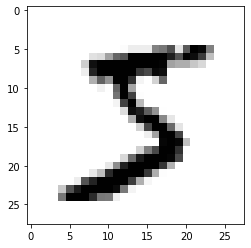

In [9]:
plt.imshow(first_image,cmap='gray_r')

In [10]:
y_train.shape

(60000,)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_cat_train=to_categorical(y_train,10)
y_cat_test= to_categorical(y_test,10)

In [16]:
y_train[0]

5

In [15]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
first_image.max()

255

In [18]:
x_train=x_train/x_train.max()

In [20]:
x_test=x_test/x_test.max()

In [21]:
x_train[0].max()

1.0

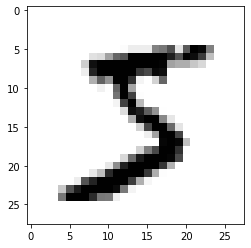

In [22]:
plt.imshow(x_train[0],cmap='gray_r')

In [23]:
x_train=x_train.reshape(60000,28,28,1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
x_test=x_test.reshape(10000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [43]:
model=Sequential()

In [44]:
#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

In [45]:
#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

In [46]:
#2D->1D
model.add(Flatten())

In [47]:
#Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2779 - accuracy: 0.9146
Epoch 2/2
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0486 - accuracy: 0.9858


In [52]:
model.metrics_names

['loss', 'accuracy']

In [54]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9859


[0.04250933974981308, 0.9858999848365784]

In [55]:
from sklearn.metrics import classification_report

In [79]:
predictions = model.predict_classes(x_test)

In [80]:
y_cat_test.shape

(10000, 10)

In [81]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [82]:
predictions[0]

7

In [83]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

